In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.metrics import r2_score


In [2]:
d=pd.read_csv(r"C:\Users\10726055\Downloads\XYZ_sales_data.csv")

In [3]:
data=pd.DataFrame(d)

In [4]:
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,23-03-2014,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,23-03-2016,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,15-05-2014,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12-04-2016,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,02-04-2014,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,02-04-2016,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,04-03-2014,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [5]:
data=data[['Order_Quantity','Date']]

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

C:\Users\10726055\AppData\Local\Temp\ipykernel_10280\4143969162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [7]:
data

,Order_Quantity,Date
0,8,2013-11-26
1,8,2015-11-26
2,23,2014-03-23
3,20,2016-03-23
4,4,2014-05-15
...,...,...
113031,3,2016-04-12
113032,22,2014-04-02
113033,22,2016-04-02
113034,24,2014-03-04


In [8]:
data1=data.groupby('Date').sum()

In [9]:
data1

,Order_Quantity
Date,
2011-01-01,8
2011-01-02,9
2011-01-03,17
2011-01-04,10
2011-01-05,5
...,...
2016-07-27,807
2016-07-28,1332
2016-07-29,895


In [10]:
scaler=MinMaxScaler()
data1['Order_Quantity']=scaler.fit_transform(data1['Order_Quantity'].values.reshape(-1,1))
# print(data['sales'])
data1


,Order_Quantity
Date,
2011-01-01,0.001898
2011-01-02,0.002169
2011-01-03,0.004338
2011-01-04,0.002440
2011-01-05,0.001085
...,...
2016-07-27,0.218547
2016-07-28,0.360900
2016-07-29,0.242408


In [11]:
train_size=int(len(data1)*0.7)
train_data,test_data=data1[:train_size],data1[train_size:]

print(train_data)
print(test_data)

            Order_Quantity
Date                      
2011-01-01        0.001898
2011-01-02        0.002169
2011-01-03        0.004338
2011-01-04        0.002440
2011-01-05        0.001085
...                    ...
2015-01-07        0.004610
2015-01-08        0.003525
2015-01-09        0.002983
2015-01-10        0.003254
2015-01-11        0.002440

[1318 rows x 1 columns]
            Order_Quantity
Date                      
2015-01-12        0.002711
2015-01-13        0.004610
2015-01-14        0.002711
2015-01-15        0.005694
2015-01-16        0.004610
...                    ...
2016-07-27        0.218547
2016-07-28        0.360900
2016-07-29        0.242408
2016-07-30        0.228308
2016-07-31        0.343275

[566 rows x 1 columns]


In [12]:
def create_sequence(data1,sequence_length):
    sequences,labels=[],[]
    for i in range(len(data1)-sequence_length):
        sequence=data1.iloc[i:i+sequence_length]['Order_Quantity']
        target=data1.iloc[i+sequence_length]['Order_Quantity']
        sequences.append(sequence)
        labels.append(target)
        print('sequence:{}'.format(sequence))
        print("labels:{}".format(target))
    return np.array(sequences), np.array(labels)

In [13]:
sequence_length=1
x_train, y_train=create_sequence(train_data,sequence_length)
x_test,y_test=create_sequence(test_data,sequence_length)

sequence:Date
2011-01-01    0.001898
Name: Order_Quantity, dtype: float64
labels:0.0021691973969631237
sequence:Date
2011-01-02    0.002169
Name: Order_Quantity, dtype: float64
labels:0.004338394793926247
sequence:Date
2011-01-03    0.004338
Name: Order_Quantity, dtype: float64
labels:0.002440347071583514
sequence:Date
2011-01-04    0.00244
Name: Order_Quantity, dtype: float64
labels:0.0010845986984815619
sequence:Date
2011-01-05    0.001085
Name: Order_Quantity, dtype: float64
labels:0.0027114967462039045
sequence:Date
2011-01-06    0.002711
Name: Order_Quantity, dtype: float64
labels:0.0010845986984815619
sequence:Date
2011-01-07    0.001085
Name: Order_Quantity, dtype: float64
labels:0.004609544468546637
sequence:Date
2011-01-08    0.00461
Name: Order_Quantity, dtype: float64
labels:0.0021691973969631237
sequence:Date
2011-01-09    0.002169
Name: Order_Quantity, dtype: float64
labels:0.0021691973969631237
sequence:Date
2011-01-10    0.002169
Name: Order_Quantity, dtype: float64
labe

In [14]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')


In [15]:
model.fit(x_train,y_train,epochs=100,batch_size=35)

Epoch 1/100
38/38 [==============================] - 4s 6ms/step - loss: 0.0618
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0461
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 4/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0330
Epoch 5/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0276
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0216
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0158
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 0.0111
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0080
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0065
Epoch 11/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 12/100
38/38 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 13/100
38/38 [=================

In [16]:
type(x_test)
predicted_Order_Quantity=model.predict(x_test)

18/18 [==============================] - 0s 3ms/step


In [17]:
predicted_Order_Quantity=scaler.inverse_transform(predicted_Order_Quantity)
actual_Order_Quantity=scaler.inverse_transform(test_data['Order_Quantity'][sequence_length:].to_numpy().reshape(-1,1))
print()

In [18]:
accuracy=r2_score(actual_Order_Quantity,predicted_Order_Quantity)
print("Accuracty:{:.2f}%".format(accuracy*100))

Accuracty:87.22%


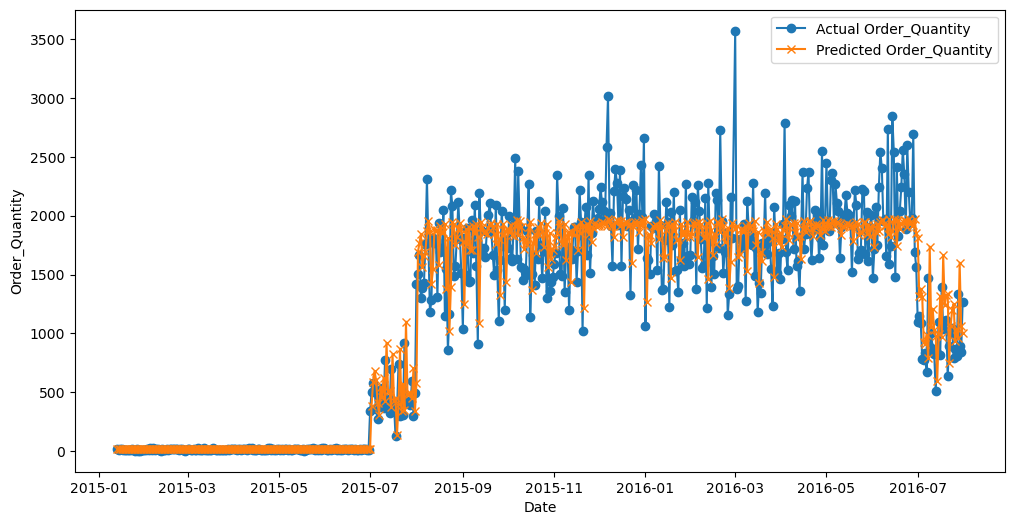

In [19]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index[sequence_length:],actual_Order_Quantity,label='Actual Order_Quantity', marker='o')
plt.plot(test_data.index[sequence_length:],predicted_Order_Quantity,label='Predicted Order_Quantity', marker='x')
plt.xlabel('Date')
plt.ylabel('Order_Quantity')
plt.legend()
plt.show()